<p style="text-align: center;"><strong><span style="font-size: 22px;">Dry Bean Dataset</span></strong></p>
<p><span style="font-size: 16px;"><strong>Group ML031</strong></span></p>
<p><span style="font-size: 16px;">Group Members</span></p>
<ol>
    <li style="font-size: 16px;">DEEPA RAM - 2021FC04231</li>
    <li style="font-size: 16px;">RAVIJEET - 2021FC04235&nbsp;</li>
    <li style="font-size: 16px;">SRITEJA AYYAGARI - 2021FC04233</li>
</ol>
<p><br></p>
<p><strong><u>Data Set information</u></strong></p>
<ol>
    <li><strong>Abstract</strong>: Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.</li>
    <li><strong>Data Type</strong>: Multivariate</li>
    <li><strong>Task</strong>: Classification</li>
    <li><strong>Attribute Type</strong>: Categorical, Integer, Real</li>
    <li><strong>Area</strong>: CS / Engineering</li>
    <li><strong>Format Type</strong>: Matrix</li>
    <li><strong>Number of Instances (records in your data set)</strong>: 13611</li>
    <li><strong>Number of Attributes (fields within each record)</strong>: &nbsp;17</li>
</ol>
<p><strong>Relevant Information</strong>: Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.</p>
<p><strong>Attribute Information</strong>:</p>
<ol>
    <li>Area (A): The area of a bean zone and the number of pixels within its boundaries.</li>
    <li>Perimeter (P): Bean circumference is defined as the length of its border.</li>
    <li>Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.</li>
    <li>Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.</li>
    <li>Aspect ratio (K): Defines the relationship between L and l.</li>
    <li>Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.</li>
    <li>Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.</li>
    <li>Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.</li>
    <li>Extent (Ex): The ratio of the pixels in the bounding box to the bean area.</li>
    <li>Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.</li>
    <li>Roundness (R): Calculated with the following formula: (4piA)/(P^2)</li>
    <li>Compactness (CO): Measures the roundness of an object: Ed/L</li>
    <li>ShapeFactor1 (SF1)</li>
    <li>ShapeFactor2 (SF2)</li>
    <li>ShapeFactor3 (SF3)</li>
    <li>ShapeFactor4 (SF4)</li>
    <li>Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)</li>
</ol>

<strong>Import Libraries/Dataset</strong>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
import imblearn
import warnings
warnings.filterwarnings('ignore')

# <strong> Data Visualization and Exploration </strong> 

In [2]:
#Importing data set using panda
#We have kept 'Bean ID' as index column for this dataframe.
initial_dataset = pd.read_csv('Dry_Bean_Dataset.csv',index_col='Bean ID')

In [3]:
#Loading sample 2 rows to identify all the features present in the dataset
initial_dataset.head(2)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
Bean ID                                                                     
1        28395    610.291       208.178117       173.888747      1.197191   
2        28734    638.018       200.524796       182.734419      1.097356   

         Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  \
Bean ID                                                                
1            0.549812       28715     190.141097  0.763923  0.988856   
2            0.411785       29172     191.272751  0.783968  0.984986   

         roundness  Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  \
Bean ID                                                                     
1         0.958027     0.913358      0.007332      0.003147      0.834222   
2         0.887034     0.953861      0.006979      0.003564      0.909851   

         ShapeFactor4  Class  
Bean ID                       
1            0.998724  SEKER  
2            0.998430  SEKER

In [4]:
#checking balanced data
df = pd.DataFrame(initial_dataset.Class.value_counts(ascending = False))
df['% of Total'] = df.Class*100/len(initial_dataset)
df = df[['Class','% of Total']]
df

Class  % of Total
DERMASON   3546   26.052458
SIRA       2636   19.366689
SEKER      2027   14.892366
HOROZ      1928   14.165014
CALI       1630   11.975608
BARBUNYA   1322    9.712732
BOMBAY      522    3.835133

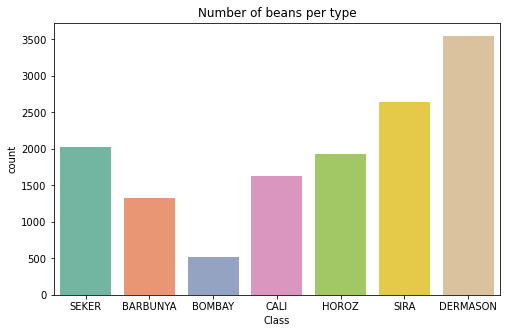

In [5]:
#visualizing bargraph of class
plt.figure(figsize = (8, 5))
sns.countplot(x = initial_dataset["Class"], palette="Set2")
plt.title("Number of beans per type")
plt.show()

<p>Data is imbalanced as there is uneven distribution across classes like <strong>BOMBAY&nbsp;</strong>class have <strong>522 (<em>3.83%</em>)</strong> entries only while <strong>DERMASON&nbsp;</strong><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>class have <strong>3546 (<em>26.05%</em>)&nbsp;</strong>entries. We would need to use resampling to balance datasets.</span></p>
<table style="border: none;border-collapse: collapse;width:185pt;">
    <tbody>
        <tr>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:.5pt solid windowtext;height:14.5pt;width:59pt;">Class</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-left:none;width:65pt;">Observations</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-left:none;width:61pt;">% of Total</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:.5pt solid windowtext;height:14.5pt;border-top:none;">DERMASON</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;box-sizing: border-box;max-width:none;">3546</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;">26.1%</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:.5pt solid windowtext;height:14.5pt;border-top:none;">SIRA</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;box-sizing: border-box;max-width:none;">2636</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;">19.4%</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:.5pt solid windowtext;height:14.5pt;border-top:none;">SEKER</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;box-sizing: border-box;max-width:none;">2027</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;">14.9%</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:.5pt solid windowtext;height:14.5pt;border-top:none;">HOROZ</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;box-sizing: border-box;max-width:none;">1928</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;">14.2%</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:.5pt solid windowtext;height:14.5pt;border-top:none;">CALI</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;box-sizing: border-box;max-width:none;">1630</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;">12.0%</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:.5pt solid windowtext;height:14.5pt;border-top:none;">BARBUNYA</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;box-sizing: border-box;max-width:none;">1322</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;">9.7%</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:.5pt solid windowtext;height:14.5pt;border-top:none;">BOMBAY</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;box-sizing: border-box;max-width:none;">522</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:center;vertical-align:middle;border:.5pt solid windowtext;border-top:none;border-left:none;">3.8%</td>
        </tr>
    </tbody>
</table><br>

In [6]:
#checking for the quality of data from mean median mode std etc
initial_dataset.describe().T

count          mean           std           min  \
Area             13611.0  53048.284549  29324.095717  20420.000000   
Perimeter        13611.0    855.283459    214.289696    524.736000   
MajorAxisLength  13609.0    320.155372     85.693199    183.601165   
MinorAxisLength  13608.0    202.273996     44.974478    122.512653   
AspectRation     13610.0      1.583268      0.246669      1.024868   
Eccentricity     13609.0      0.750930      0.091962      0.218951   
ConvexArea       13611.0  53768.200206  29774.915817  20684.000000   
EquivDiameter    13611.0    253.064220     59.177120    161.243764   
Extent           13611.0      0.749733      0.049086      0.555315   
Solidity         13608.0      0.987142      0.004661      0.919246   
roundness        13611.0      0.873282      0.059520      0.489618   
Compactness      13607.0      0.799830      0.061691      0.640577   
ShapeFactor1     13607.0      0.006564      0.001128      0.002778   
ShapeFactor2     13609.0      0.001716      0.000596      0.000564   
ShapeFactor3     13611.0      0.643590      0.098996      0.410339   
ShapeFactor4     13611.0      0.995063      0.004366      0.947687   

                          25%           50%           75%            max  
Area             36328.000000  44652.000000  61332.000000  254616.000000  
Perimeter          703.523500    794.941000    977.213000    1985.370000  
MajorAxisLength    253.319280    296.899313    376.497678     738.860154  
MinorAxisLength    175.840519    192.443880    217.036082     460.198497  
AspectRation         1.432352      1.551132      1.707118       2.430306  
Eccentricity         0.715953      0.764446      0.810471       0.911423  
ConvexArea       36714.500000  45178.000000  62294.000000  263261.000000  
EquivDiameter      215.068003    238.438026    279.446467     569.374358  
Extent               0.718634      0.759859      0.786851       0.866195  
Solidity             0.985670      0.988283      0.990013       0.994677  
roundness            0.832096      0.883157      0.916869       0.990685  
Compactness          0.762444      0.801227      0.834234       0.987303  
ShapeFactor1         0.005900      0.006645      0.007272       0.010451  
ShapeFactor2         0.001153      0.001694      0.002170       0.003665  
ShapeFactor3         0.581359      0.642044      0.696006       0.974767  
ShapeFactor4         0.993703      0.996386      0.997883       0.999733

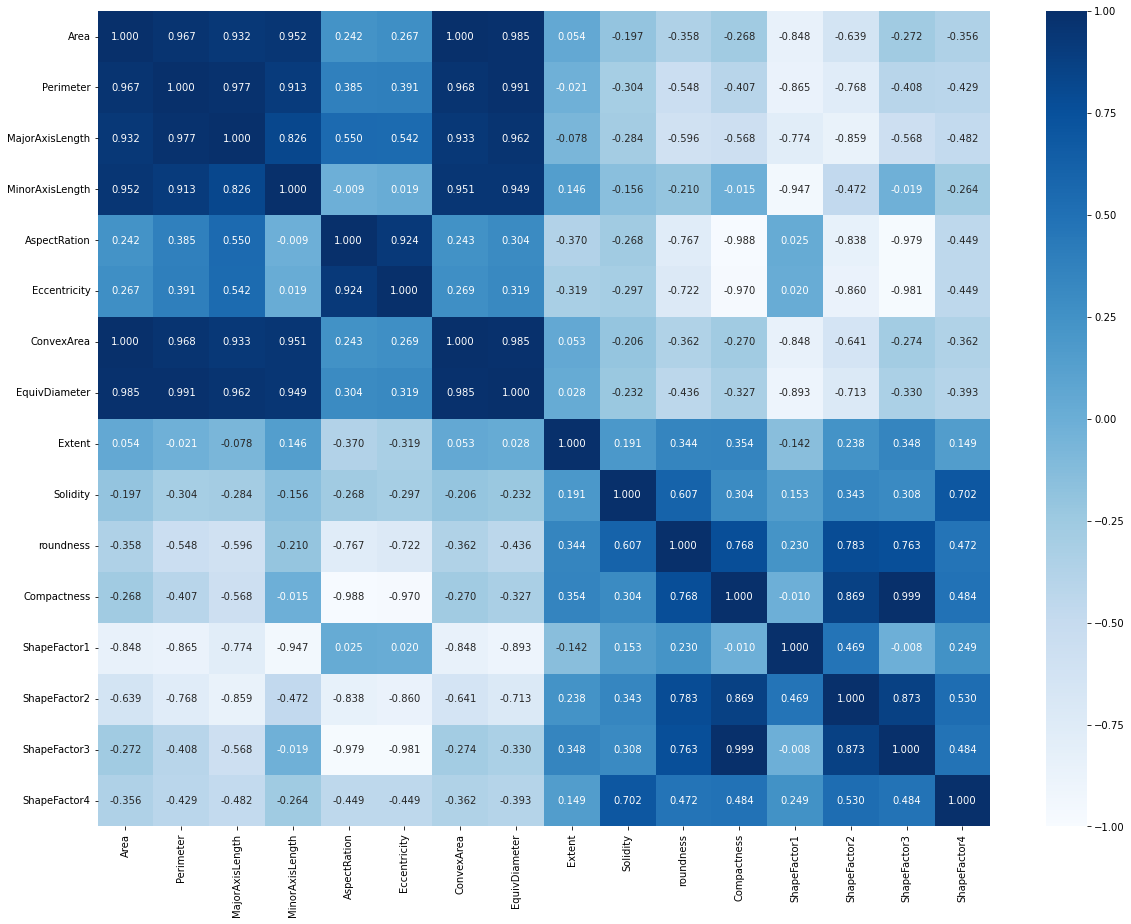

In [7]:
# Display correlation matrix
plt.figure(figsize = (20, 15))
sns.heatmap(initial_dataset.corr(), 
            annot = True, 
            cmap = "Blues",
            fmt = ".3f",
            vmin = -1.00, vmax = 1.00)
plt.show()

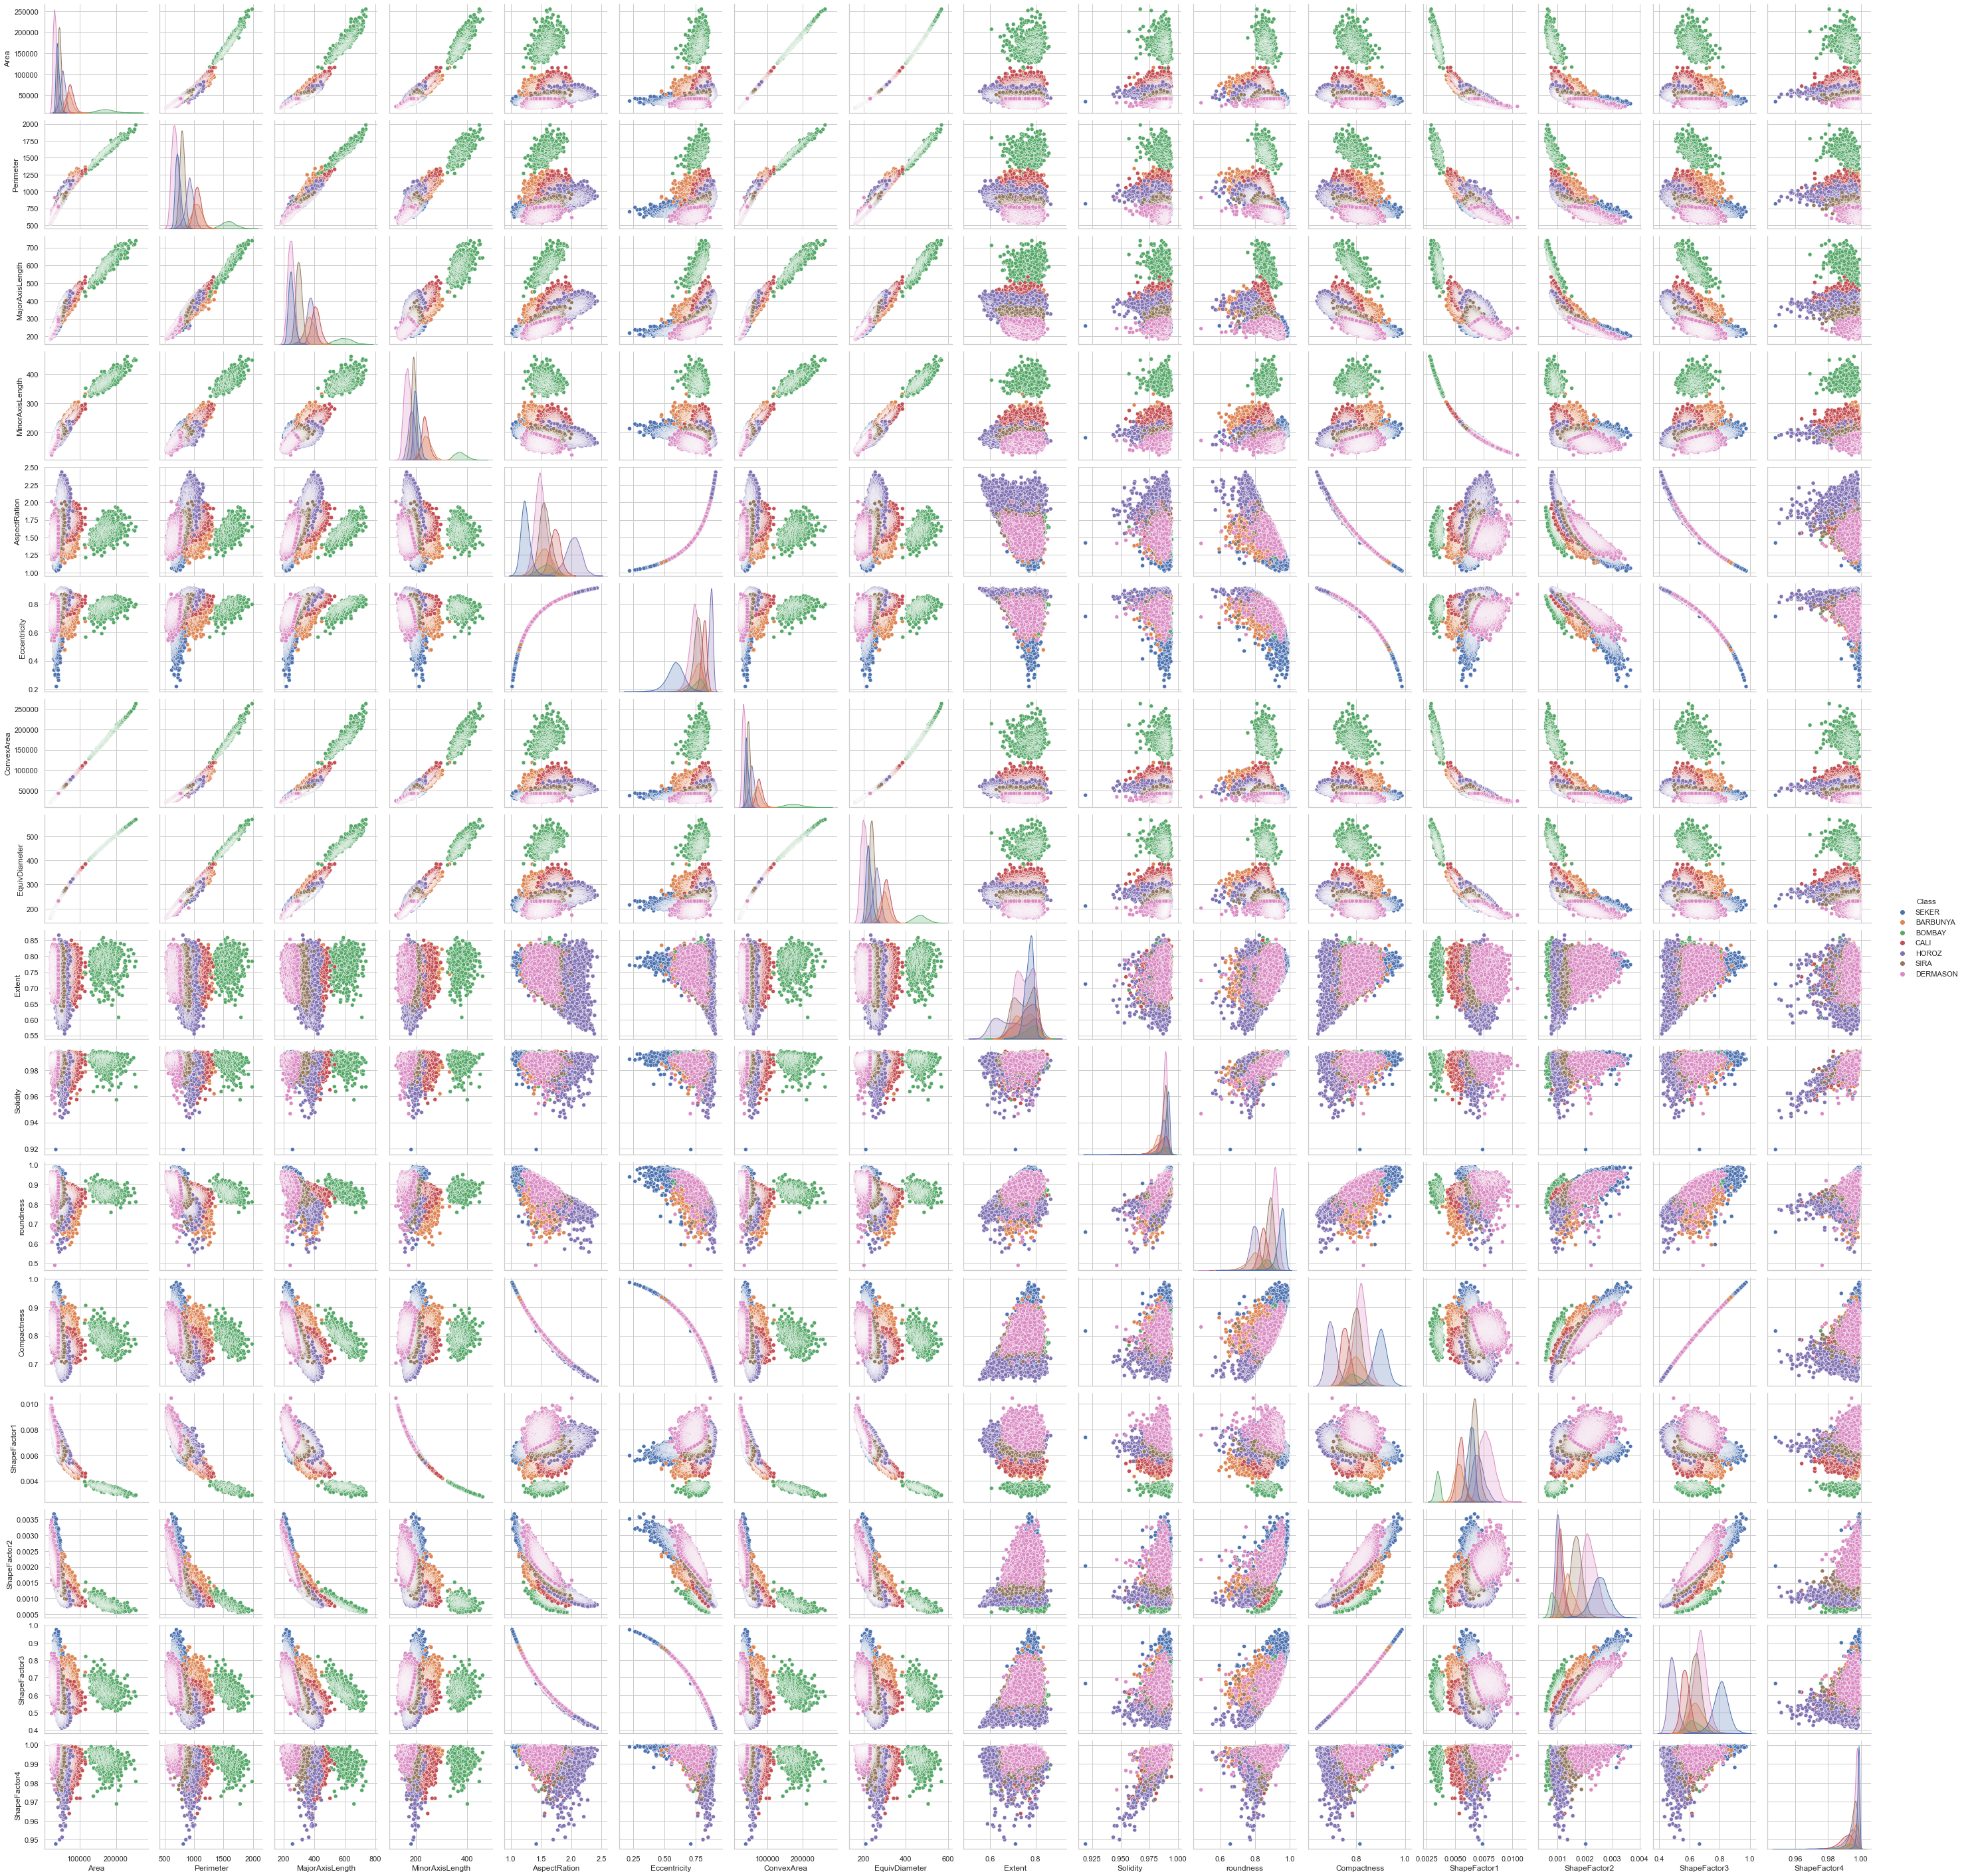

In [8]:
#Visualisation for ALl variable Scatterplot including Class labels
sns.set_theme(style="whitegrid")
sns.pairplot(initial_dataset, hue="Class")

In [10]:
initial_dataset_v1 = initial_dataset

#feature selected based on correlation
initial_dataset = initial_dataset[['Area','AspectRation', 'Eccentricity','Extent','Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor4','Class']]

<h4>Describing the Scatterplot Matrix</h4>
<p>Looking at these scatterplots, we can assert that there are clear clusters (for classes) forming within scatterplots, <span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>namely between the area and perimeter attributes with all other attributes. <span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>We can assume that these clusters are filled with beans with similar attributes and may be more likely to be classified within a particular class.</span>&nbsp;</span></p>
<p><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>It is also clear that there is clear relation between Area and&nbsp;</span></span></p>
<ol>
    <li><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>Perimeter (Positive correlation of 0.967)</span></span></li>
    <li><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>MajorAxisLength (<span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>Positive correlation of&nbsp;</span> 0.932)</span></span></li>
    <li><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>MinorAxisLength (<span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>Positive correlation of&nbsp;</span> 0.952)</span></span></li>
    <li><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>EquivDiameter (<span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>Positive correlation of&nbsp;</span> 0.985)</span></span></li>
    <li><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>ConvexArea <span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>(</span><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; float: none; display: inline !important;'>Positive correlation of&nbsp;</span><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>&nbsp;0.9999)</span>&nbsp;</span></span></li>
    <li><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>ShapeFactor1 (Negative <span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>correlation of&nbsp;</span> -0.848)</span></span></li>
</ol>
<p><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>We can deduce from these that Area/Perimeter related attributes are intercorrelated. So we might need to drop some of these attributes later on.&nbsp;</span></span></p>
<p><br></p>
<p><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'><span style='color: rgb(0, 0, 0); font-family: "Times New Roman"; font-size: medium; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>Also it have been observed that ShapeFactor3 and Compactness seems to highly correlated and also both these attributes have similar correlation with other attributes as well suggesting that SF3 might have been derived from Compactness only.</span></span></p>

# Data Pre-processing and cleaning

In [11]:
#checing for the null values
missing_value = pd.DataFrame(initial_dataset.isnull().sum())
missing_value.columns = ['Total Missing Values']
missing_value['% Missing Values'] = missing_value['Total Missing Values']*100/len(initial_dataset)
missing_value

Total Missing Values  % Missing Values
Area                             0          0.000000
AspectRation                     1          0.007347
Eccentricity                     2          0.014694
Extent                           0          0.000000
Solidity                         3          0.022041
roundness                        0          0.000000
Compactness                      4          0.029388
ShapeFactor1                     4          0.029388
ShapeFactor2                     2          0.014694
ShapeFactor4                     0          0.000000
Class                            0          0.000000

<p>There are minimal missing values only. Maximum missing values are in <strong>Compactness&nbsp;</strong>and <strong>ShapeFactor1&nbsp;</strong>and that too just <strong>0.03%</strong>. We will fill these missing values by median of that column.</p>

In [12]:
#Filling missing values by Median value 
initial_dataset_v1['MajorAxisLength'] = initial_dataset_v1['MajorAxisLength'].fillna(initial_dataset_v1['MajorAxisLength'].median())
initial_dataset_v1['MinorAxisLength'] = initial_dataset_v1['MinorAxisLength'].fillna(initial_dataset_v1['MinorAxisLength'].median())
initial_dataset_v1['AspectRation'] = initial_dataset_v1['AspectRation'].fillna(initial_dataset_v1['AspectRation'].median())
initial_dataset_v1['Eccentricity'] = initial_dataset_v1['Eccentricity'].fillna(initial_dataset_v1['Eccentricity'].median())
initial_dataset_v1['Solidity'] = initial_dataset_v1['Solidity'].fillna(initial_dataset_v1['Solidity'].median())
initial_dataset_v1['Compactness'] = initial_dataset_v1['Compactness'].fillna(initial_dataset_v1['Compactness'].median())
initial_dataset_v1['ShapeFactor1'] = initial_dataset_v1['ShapeFactor1'].fillna(initial_dataset_v1['ShapeFactor1'].median())
initial_dataset_v1['ShapeFactor2'] = initial_dataset_v1['ShapeFactor2'].fillna(initial_dataset_v1['ShapeFactor2'].median())


In [13]:
#initial_dataset['MajorAxisLength'] = initial_dataset['MajorAxisLength'].fillna(initial_dataset['MajorAxisLength'].median())
#initial_dataset['MinorAxisLength'] = initial_dataset['MinorAxisLength'].fillna(initial_dataset['MinorAxisLength'].median())
initial_dataset['AspectRation'] = initial_dataset['AspectRation'].fillna(initial_dataset['AspectRation'].median())
initial_dataset['Eccentricity'] = initial_dataset['Eccentricity'].fillna(initial_dataset['Eccentricity'].median())
initial_dataset['Solidity'] = initial_dataset['Solidity'].fillna(initial_dataset['Solidity'].median())
initial_dataset['Compactness'] = initial_dataset['Compactness'].fillna(initial_dataset['Compactness'].median())
initial_dataset['ShapeFactor1'] = initial_dataset['ShapeFactor1'].fillna(initial_dataset['ShapeFactor1'].median())
initial_dataset['ShapeFactor2'] = initial_dataset['ShapeFactor2'].fillna(initial_dataset['ShapeFactor2'].median())

In [14]:
dry_beans_features = initial_dataset.drop(["Class"], axis = 1)

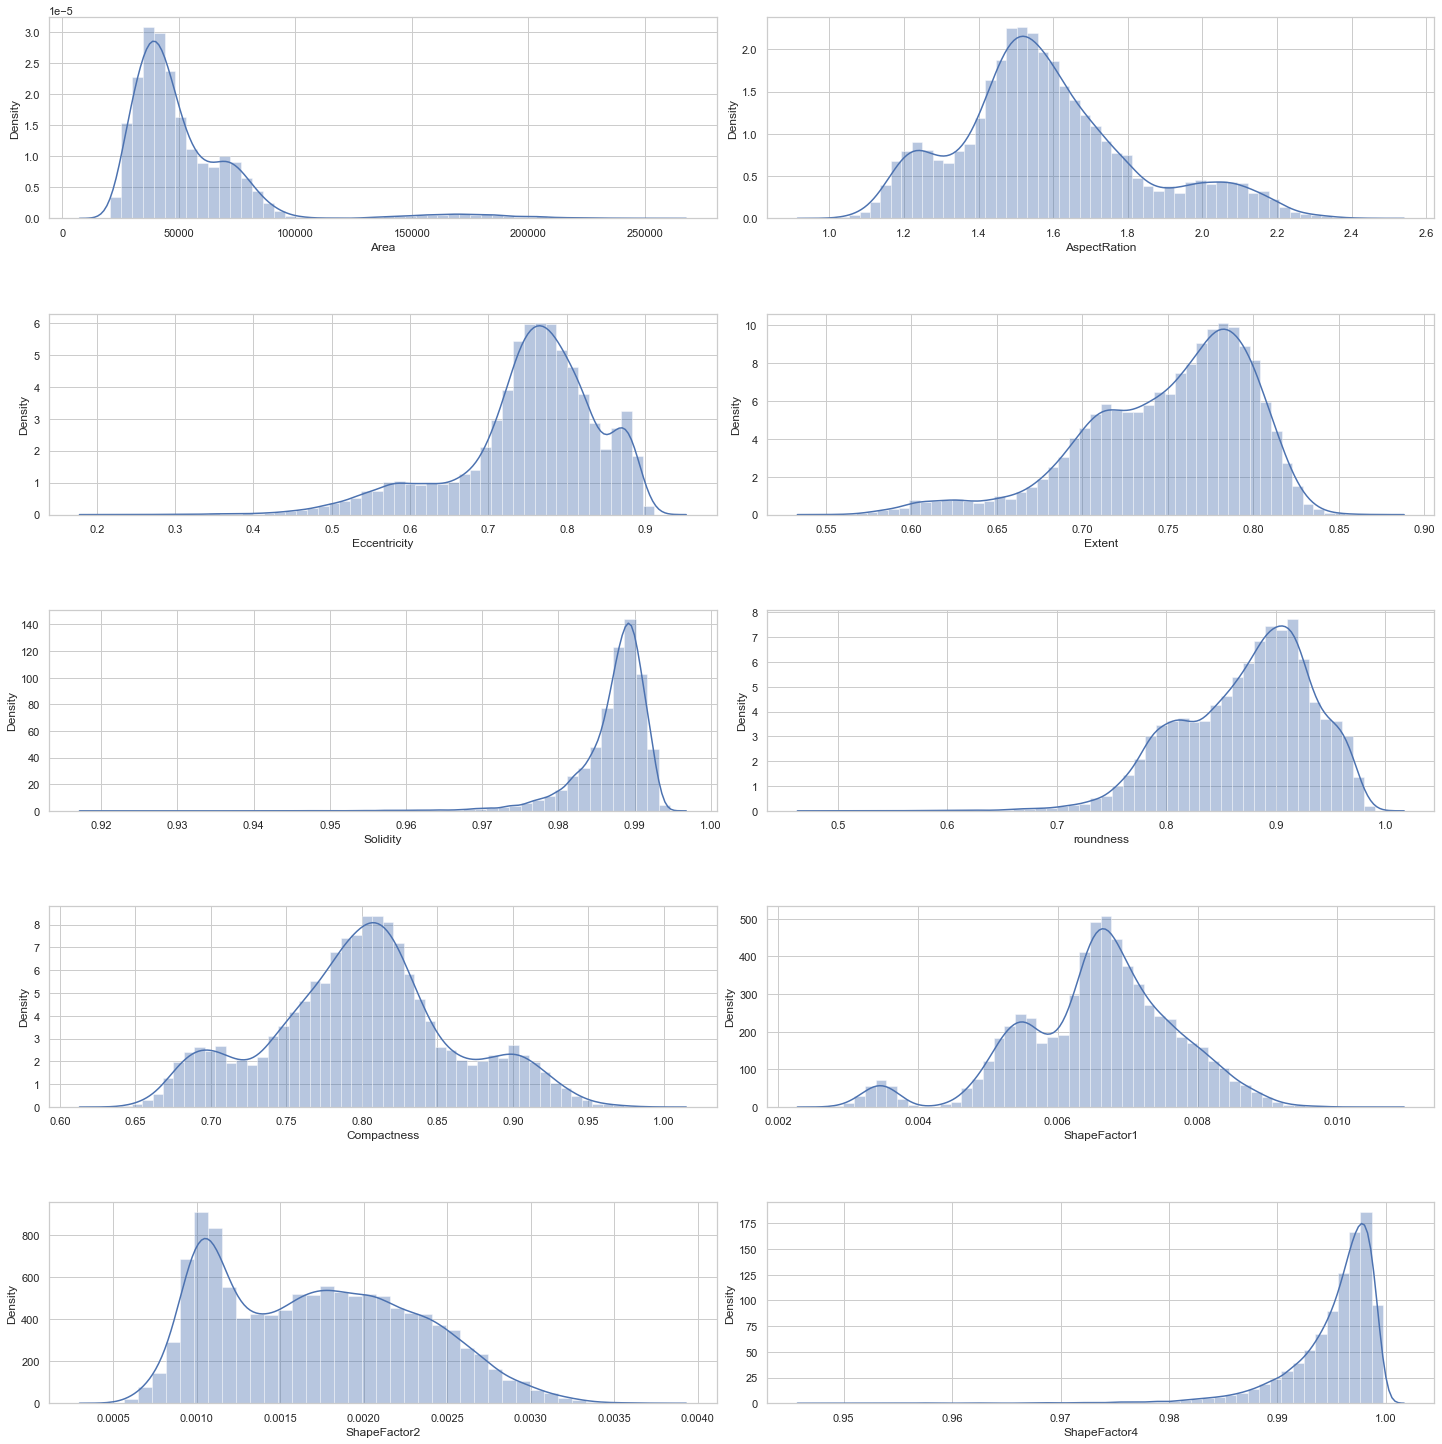

In [15]:
# Plot features value distribution
fig, axs = plt.subplots(ncols = 2, nrows = 5, figsize = (20, 20))
index = 0

axs = axs.flatten()
for k, v in dry_beans_features.items():
    sns.distplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

<p>The plots above show that values in some features have similar distribution (e.g., &quot;area&quot;, &quot;perimeter&quot;, &quot;major&quot; and &quot;minor&quot; axis length), whereas others are completely different. For example, neither &quot;shape factor&quot; looks similar to another. Some distributions are, more or less, bi- or trimodal, whereas others have only one mode. Distribution shapes of some features suggest existence of outliers.&nbsp;</p>

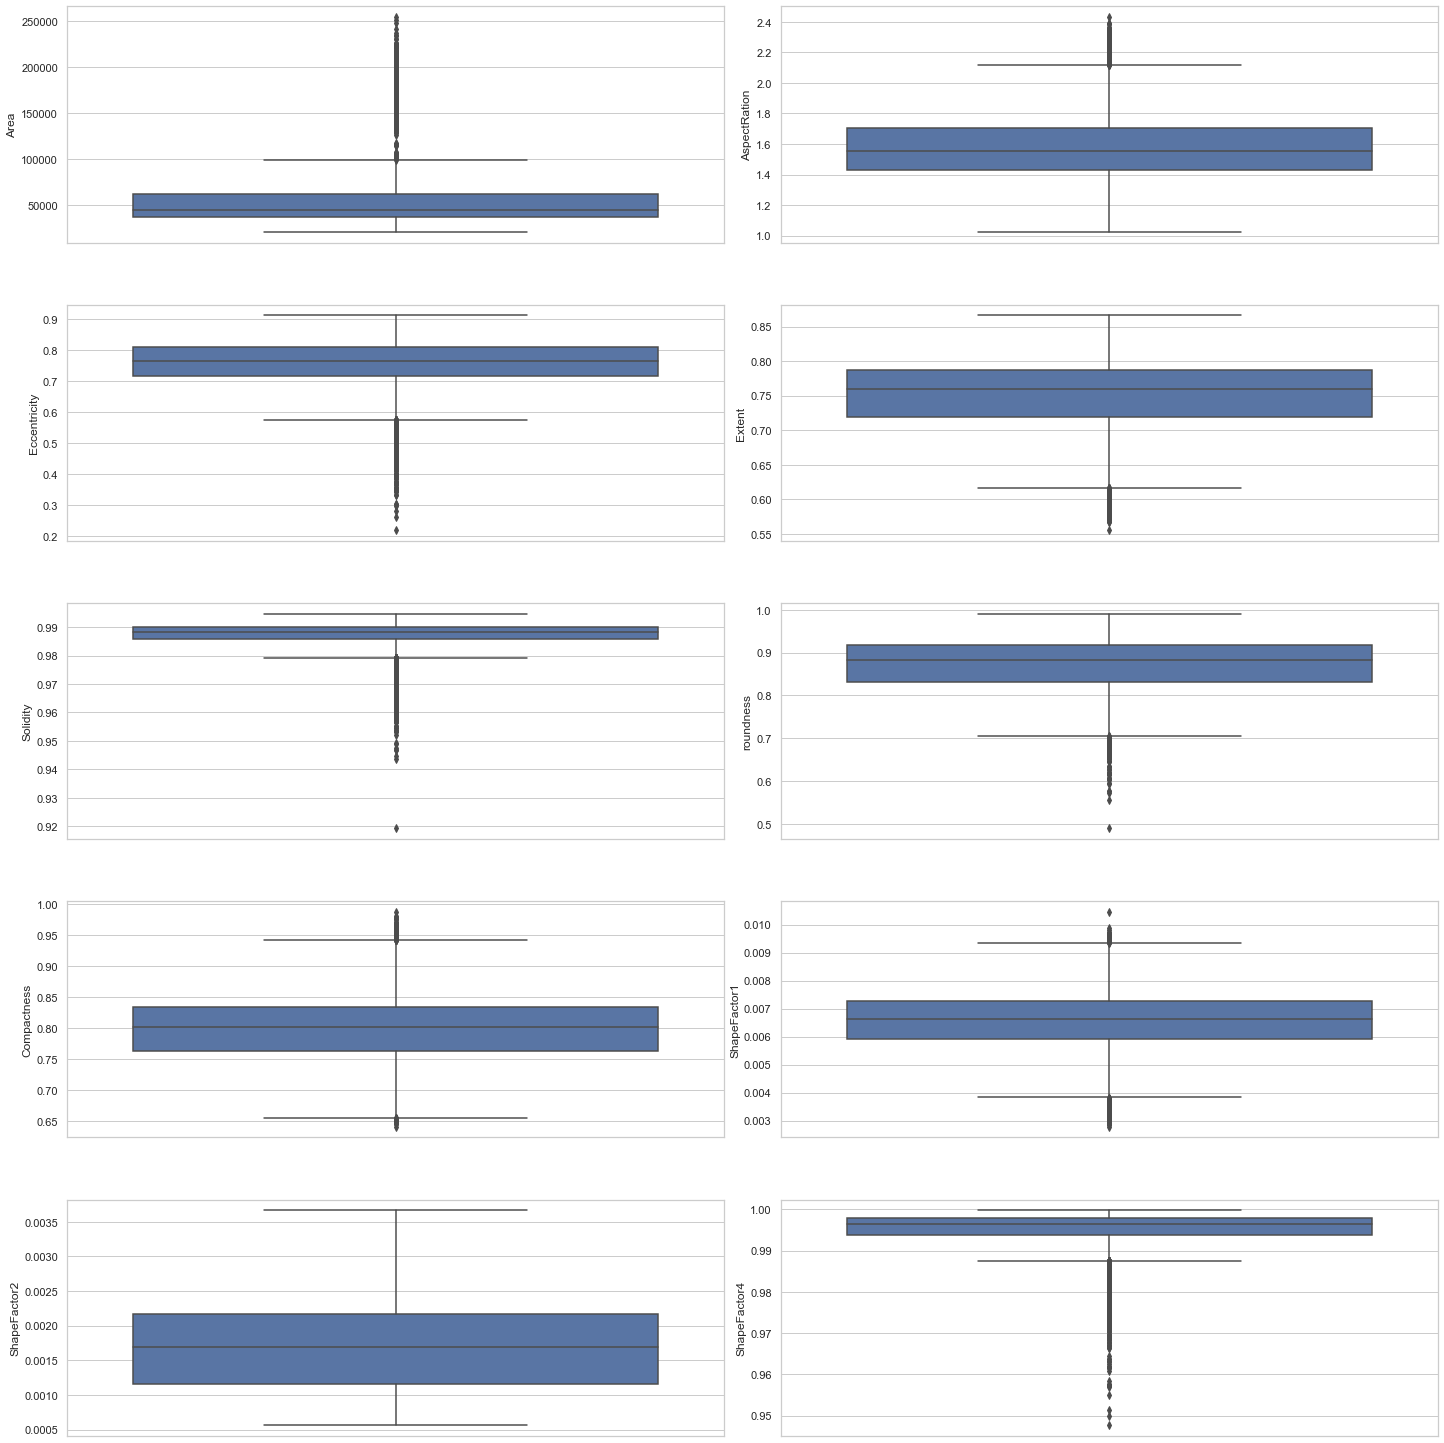

In [16]:
# Display boxplots per feature
fig, axs = plt.subplots(ncols = 2, nrows = 5, figsize = (20, 20))
idx = 0
axs = axs.flatten()
for k, v in dry_beans_features.items():
    sns.boxplot(y = k, data = dry_beans_features, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [17]:
#capping/winsor for outliers
from scipy import stats
initial_dataset = initial_dataset[(np.abs(stats.zscore(dry_beans_features)) <= 3).all(axis=1)]
initial_dataset_v1 = initial_dataset_v1[(np.abs(stats.zscore(initial_dataset_v1.drop(["Class"], axis = 1))) <= 3).all(axis=1)]
#dataset = dataset.dropna()

In [18]:
def jobs_run(x_train,y_train,x_test,y_test,description='Testing'):
    classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
    classifier.fit(x_train, y_train)
    y_pred=classifier.predict(x_test)
    Evaluation=pd.DataFrame(['KNN Classifier'],columns=['Algorithm'])
    Evaluation.loc[0,'Description'] = description
    Evaluation.loc[0,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
    Evaluation.loc[0,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
    Evaluation.loc[0,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
    Evaluation.loc[0,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
    
    dtc_model = DecisionTreeClassifier(random_state = 0)
    dtc_model.fit(x_train,y_train)
    y_pred = dtc_model.predict(x_test)
    
    Evaluation.loc[1,'Algorithm']='Decision Tree'
    Evaluation.loc[1,'Description'] = description
    Evaluation.loc[1,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
    Evaluation.loc[1,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
    Evaluation.loc[1,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
    Evaluation.loc[1,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
    
    cla = GaussianNB()
    cla.fit(x_train, y_train)
    y_pred=cla.predict(x_test)
    
    Evaluation.loc[2,'Algorithm']='Naive Bayes'
    Evaluation.loc[2,'Description'] = description
    Evaluation.loc[2,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
    Evaluation.loc[2,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
    Evaluation.loc[2,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
    Evaluation.loc[2,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
    
    classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier1.fit(x_train, y_train)
    y_pred=classifier1.predict(x_test)
    
    Evaluation.loc[3,'Algorithm']='Random Forest Classifier'
    Evaluation.loc[3,'Description'] = description
    Evaluation.loc[3,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
    Evaluation.loc[3,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
    Evaluation.loc[3,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
    Evaluation.loc[3,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
    
    regressor=LogisticRegression(random_state=0)
    regressor.fit(x_train,y_train)
    y_pred=regressor.predict(x_test)
    
    Evaluation.loc[4,'Algorithm']='Logistic Regression'
    Evaluation.loc[4,'Description'] = description
    Evaluation.loc[4,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
    Evaluation.loc[4,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
    Evaluation.loc[4,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
    Evaluation.loc[4,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
    
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(x_train, y_train)
    y_pred=classifier.predict(x_test)
    
    Evaluation.loc[5,'Algorithm']='SVM linear'
    Evaluation.loc[5,'Description'] = description
    Evaluation.loc[5,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
    Evaluation.loc[5,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
    Evaluation.loc[5,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
    Evaluation.loc[5,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
    
    cl = SVC(kernel = 'rbf', random_state = 0)
    cl.fit(x_train, y_train)
    y_pred=cl.predict(x_test)
    
    Evaluation.loc[6,'Algorithm']='SVM RBF'
    Evaluation.loc[6,'Description'] = description
    Evaluation.loc[6,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
    Evaluation.loc[6,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
    Evaluation.loc[6,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
    Evaluation.loc[6,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
    
    return Evaluation

In [19]:
#Data Spliting
x= initial_dataset.iloc[:,:-1].values  
y= initial_dataset.iloc[:, -1].values 

#train test split
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=15)


#SMOTE balancing
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

st_x= StandardScaler()  
x_train_std= st_x.fit_transform(x_train)    
x_test_std= st_x.transform(x_test) 


nor_x= Normalizer()  
x_train_nrm= nor_x.fit_transform(x_train)    
x_test_nrm= nor_x.transform(x_test) 

print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After Standardization, the shape of train_X: {}'.format(x_train_std.shape))

Before OverSampling, the shape of train_X: (10012, 10)
After OverSampling, the shape of train_X: (19726, 10)
After Standardization, the shape of train_X: (10012, 10)


In [20]:
Evaluation = jobs_run(x_train_res,y_train_res,x_test,y_test,description='Selected Features and SMOT Resampling')
Evaluation = Evaluation.append(jobs_run(x_train,y_train,x_test,y_test,description='Selected Features and Without Sampling and Standardization'))
Evaluation = Evaluation.append(jobs_run(x_train_std,y_train,x_test_std,y_test,description='Selected Features and After Standardization'))
Evaluation = Evaluation.append(jobs_run(x_train_nrm,y_train,x_test_nrm,y_test,description='Selected Features and After Normalization'))

In [21]:
#Data Spliting
x= initial_dataset_v1.iloc[:,:-1].values  
y= initial_dataset_v1.iloc[:, -1].values 

#train test split
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=15)


#SMOTE balancing
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

st_x= StandardScaler()  
x_train_std= st_x.fit_transform(x_train)    
x_test_std= st_x.transform(x_test) 


nor_x= Normalizer()  
x_train_nrm= nor_x.fit_transform(x_train)    
x_test_nrm= nor_x.transform(x_test) 

print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After Standardization, the shape of train_X: {}'.format(x_train_std.shape))

Before OverSampling, the shape of train_X: (9989, 16)
After OverSampling, the shape of train_X: (19593, 16)
After Standardization, the shape of train_X: (9989, 16)


In [22]:
Evaluation = Evaluation.append(jobs_run(x_train_res,y_train_res,x_test,y_test,description='All Features and SMOT Resampling'))
Evaluation = Evaluation.append(jobs_run(x_train,y_train,x_test,y_test,description='All Features and Without Sampling and Standardization'))
Evaluation = Evaluation.append(jobs_run(x_train_std,y_train,x_test_std,y_test,description='All Features and After Standardization'))
Evaluation = Evaluation.append(jobs_run(x_train_nrm,y_train,x_test_nrm,y_test,description='All Features and After Normalization'))

In [23]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'], ascending=False)

    return(vif)

In [28]:
from sklearn.model_selection import GridSearchCV
# Perform GridSearchCV to tune best-fit LR model
param = {'C': [10**-2,10**-1,10**0,10**1,10**2]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear')
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(x_train_std, y_train)

# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_, penalty='l1', solver='liblinear')
model.fit(x_train_std, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [44]:
coef = model.coef_[0]
nimp_features = pd.Series(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'])[list(coef==0)]

In [45]:
nimp_features

7     EquivDiameter
11      Compactness
14     ShapeFactor3
dtype: object